In [469]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import copy

np.random.seed(42)

In [470]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

In [471]:
X, Y = load_planar_dataset()

In [472]:
X.shape, Y.shape


((2, 400), (1, 400))

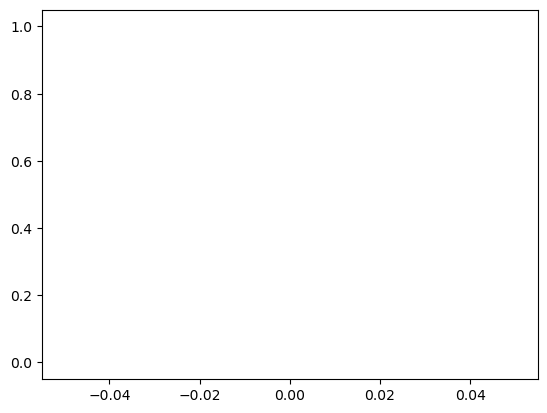

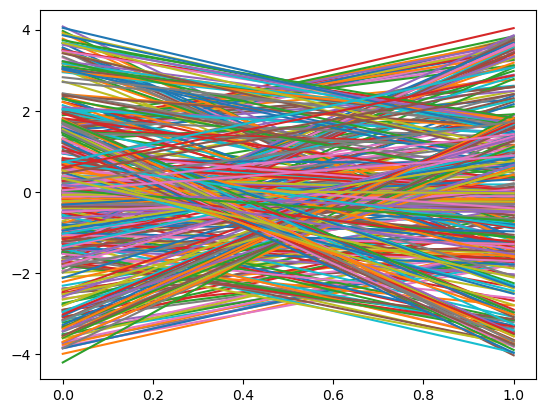

In [473]:

plt.plot(Y)
plt.show()
plt.plot(X)
plt.show()

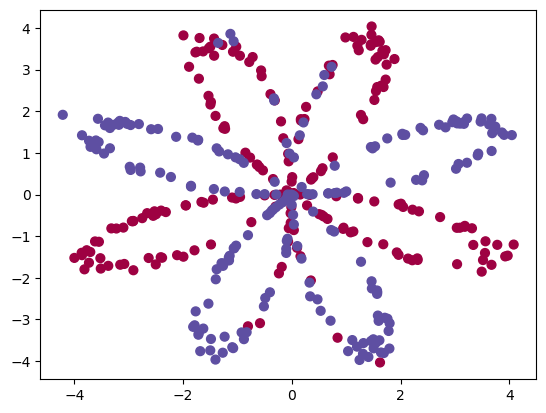

In [474]:
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral)

In [475]:
n=X.shape[0]
m=X.shape[1]
print(f"n={n}, m={m}")



n=2, m=400


In [476]:
clf = LogisticRegression()
clf.fit(X.T, Y.T)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [477]:
clf.score(X=X.T, y=Y.T)

0.47

In [478]:
Y_pred = clf.predict(X.T)
Y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [479]:
clf.predict_proba(X.T)

array([[0.66268351, 0.33731649],
       [0.42062013, 0.57937987],
       [0.43107097, 0.56892903],
       [0.39090367, 0.60909633],
       [0.63422407, 0.36577593],
       [0.29351233, 0.70648767],
       [0.64527679, 0.35472321],
       [0.45275981, 0.54724019],
       [0.61614757, 0.38385243],
       [0.58584001, 0.41415999],
       [0.65416334, 0.34583666],
       [0.32387967, 0.67612033],
       [0.5995847 , 0.4004153 ],
       [0.5855215 , 0.4144785 ],
       [0.64779406, 0.35220594],
       [0.51725117, 0.48274883],
       [0.64399581, 0.35600419],
       [0.56236005, 0.43763995],
       [0.67261237, 0.32738763],
       [0.66441395, 0.33558605],
       [0.58411179, 0.41588821],
       [0.62144408, 0.37855592],
       [0.64364131, 0.35635869],
       [0.65451903, 0.34548097],
       [0.60943325, 0.39056675],
       [0.6729322 , 0.3270678 ],
       [0.66248469, 0.33751531],
       [0.64430773, 0.35569227],
       [0.6610997 , 0.3389003 ],
       [0.61502949, 0.38497051],
       [0.

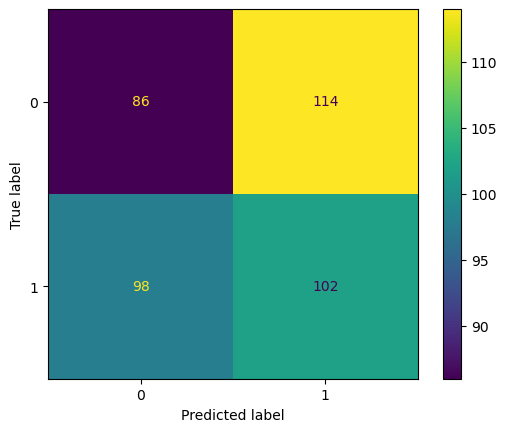

In [480]:
cm = confusion_matrix(y_true=Y.T, y_pred=Y_pred.T)

cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot()

In [481]:
def layer_sizes(X, Y, h):
    n = X.shape[0]
    k = Y.shape[0]
    return n, h, k

In [482]:
def initialize_parameters(n, h, k):
  W1 = np.random.randn(n, h) * 0.01
  b1 = np.zeros((h, 1))
  W2 = np.random.randn(h, k) * 0.01
  b2 = np.zeros((k, 1))
  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}
    
  return parameters

In [483]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [484]:
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    A0 = X
    Z1 = np.matmul(W1.T, A0) + b1
    A1 = np.tanh(Z1)
    Z2 = np.matmul(W2.T, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    neurons = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, neurons

In [485]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -1/m * (np.matmul(Y, np.log(A2).T) + np.matmul(1-Y, np.log(1-A2).T))
    cost = float(np.squeeze(cost))
    
    return cost

In [486]:
def backward_propagation(parameters, neurons, X, Y):

    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A0 = X
    A1 = neurons["A1"]
    A2 = neurons["A2"]
 
    dJdZ2 = A2 - Y
    dJdW2 = 1/m* np.matmul(A1, dJdZ2.T)
    dJdb2 = dJdZ2.mean(axis = 1, keepdims = True)
    dJdZ1 = np.multiply(np.matmul(W2, dJdZ2), 1 - np.power(A1, 2))
    dJdW1 = 1/m*np.matmul(A0, dJdZ1.T)
    dJdb1 = dJdZ1.mean(axis = 1, keepdims = True)
    
    grads = {"dJdW1": dJdW1,
             "dJdb1": dJdb1,
             "dJdW2": dJdW2,
             "dJdb2": dJdb2}
    
    return grads

In [487]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    
    W1 = copy.deepcopy(parameters["W1"])
    b1 = parameters["b1"]
    W2 = copy.deepcopy(parameters["W2"])
    b2 = parameters["b2"]
    
    dJdW1 = grads["dJdW1"]
    dJdb1 = grads["dJdb1"]
    dJdW2 = grads["dJdW2"]
    dJdb2 = grads["dJdb2"]
    
    W1 = W1 - learning_rate * dJdW1
    b1 = b1 - learning_rate * dJdb1
    W2 = W2 - learning_rate * dJdW2
    b2 = b2 - learning_rate * dJdb2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [488]:
def nn_model(X, Y, h, num_iterations = 10000, print_cost=False):
    n,h,k = layer_sizes(X,Y,h)
    parameters = initialize_parameters(n,h,k)

    for i in range(num_iterations):

        A2, neurons = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, neurons, X, Y)
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 1000 == 0:
            print (f"Cost after iteration {i}: {cost}")

    return parameters

In [489]:
def predict(parameters, X):
    A2, neurons = forward_propagation(X, parameters)
    predictions = np.where(A2 > 0.5, 1,0)
    
    return predictions

In [490]:
parameters_nn = nn_model(X, Y, h = 4, num_iterations = 10000, print_cost=True)

Cost after iteration 0: 0.6931040276315801
Cost after iteration 1000: 0.2887492756421138
Cost after iteration 2000: 0.27680609572869813
Cost after iteration 3000: 0.2696195900949871
Cost after iteration 4000: 0.2640999161333882
Cost after iteration 5000: 0.26026778375167836
Cost after iteration 6000: 0.25759343748463304
Cost after iteration 7000: 0.25562564318458464
Cost after iteration 8000: 0.2541043849192414
Cost after iteration 9000: 0.2528833617331282


In [491]:
predictions  = predict(parameters_nn, X)

In [492]:
accuracy_score(y_true=Y.reshape(-1), y_pred=predictions.reshape(-1))

0.91

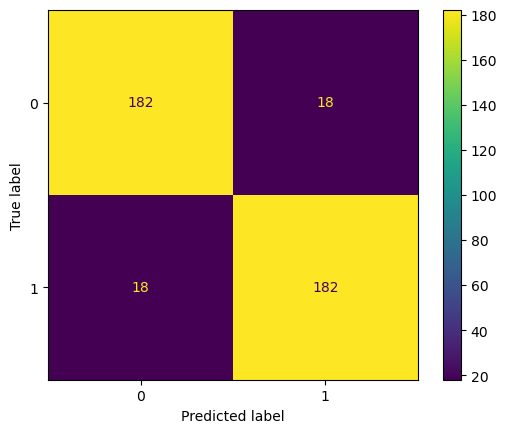

In [493]:
cm = confusion_matrix(y_true=Y.reshape(-1), y_pred=predictions.reshape(-1))
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()